<a href="https://colab.research.google.com/github/nhimxu00/Th-c-h-nh-C-/blob/master/Day_2_Lab_Population_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population data analysis

The data which is used in this workshop is provided by [World Bank Group](http://www.worldbank.org/).

The World Bank Group is one of the world’s largest sources of funding and knowledge for developing countries. Its five institutions share a commitment to reducing poverty, increasing shared prosperity, and promoting sustainable development.

## Get Data

In [0]:
# Let's run this code to import the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

data = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/CSWS_Population.csv')

In [0]:
# Let's use head(), tail(), sample(), info(), describe() to have an overview
# Your code here

In [0]:
# Base on the information we have, please answer those questions:
# How many rows are there in the dataset?
# Your answser: ..
# How many columns are there in the dataset?
# Your answser: ..
# Do you understand the meaning of each column? You can google if needed.
# Your answser: ..
# Do you understand how the data is organized?
# Your answer: ..

In [0]:
# Now let's look deeper into the dataset
# How many countries are there in the dataset?
# Your code here
nr_countries = ___
print('There are', nr_countries, 'countries.')

In [0]:
# What is the range of years(from when to when)?
# Your code here
years = ___
print('The dataset cover from', ___, 'to', ___)

As you can see our dataset is from 1960 to 2017 and we have data of 264 countries and organizations all around the world.

Ok enough with cold numbers, let's move on an interesting part Data Visualization.

## Data Visualization



### Display the GDP per Captita of Vietnam

In [0]:
# We can get the data of Viet Nam by passing a condition
# inside the squared brackets.
# Your code here
vietnam_data = data[___]
vietnam_data.head()

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
14790,Vietnam,VNM,1960,59.041,16554502.0,16116127.0,NaN,32670629.0
14791,Vietnam,VNM,1961,59.722,17057908.0,16608864.0,NaN,33666772.0
14792,Vietnam,VNM,1962,60.391,17572019.0,17112146.0,NaN,34684165.0
14793,Vietnam,VNM,1963,61.024,18096738.0,17625353.0,NaN,35722091.0
14794,Vietnam,VNM,1964,61.585,18632569.0,18148416.0,NaN,36780985.0


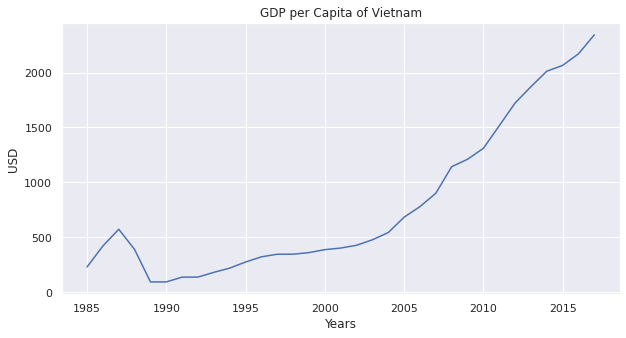

In [0]:
# Now let's plot the GDP per Capita of Vietnam.
# Try to understand the meaning of every single line of code here below
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='gdpPerCapita', data=vietnam_data)
# Or another way
# plt.plot(vietnam_data['year'], vietnam_data['gdpPerCapita'])
plt.title('GDP per Capita of Vietnam')
plt.xlabel('Years')
plt.ylabel('USD')
plt.show()

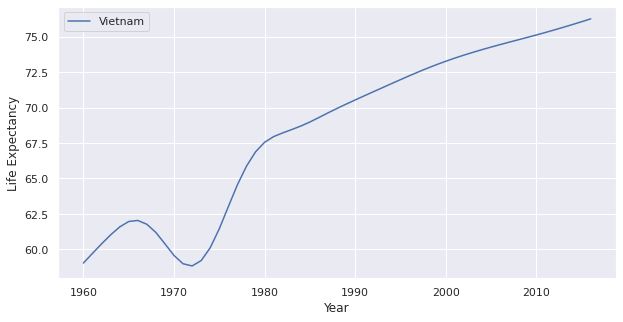

In [0]:
# Your turn, let's plot graphs of other columns that we have: 
# 'lifeExpectancy', 'population' over year
# Your code here
# lifeExpectancy over year
___

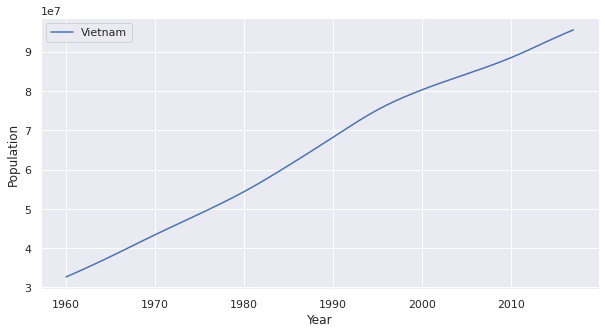

In [0]:
# population over year
___

In [0]:
# Now let's compare Vietnam with our neighbours in ASIAN
# This is a list of all ASIAN countries are there in our dataset
Southeast_Asia = [
    'Lao PDR', 
    'Thailand', 
    'Brunei Darussalam', 
    'Cambodia', 
    'Timor-Leste', 
    'Indonesia', 
    'Malaysia', 
    'Myanmar', 
    'Philippines', 
    'Singapore', 
    'Vietnam'
]

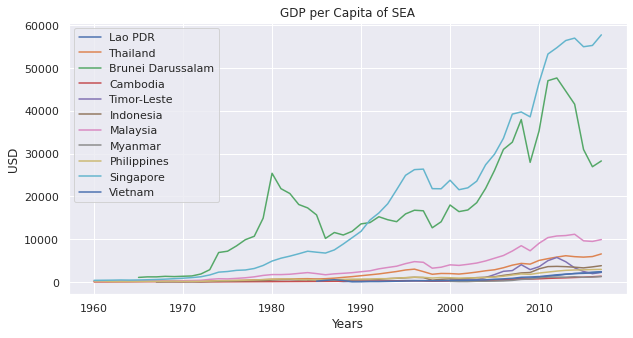

In [0]:
# A bit challenge here, can you plot all GDP per Capita of all countries of ASIAN 
# in one graph? Raise your hand if you need help.
# Your code here

plt.figure(figsize=(10, 5))
for country in Southeast_Asia:
    country_data = data[___]
    sns.lineplot(x=___, y=___, data=___, label=___)
    
plt.title('GDP per Capita of SEA')
plt.xlabel('Years')
plt.ylabel('USD')
plt.show()

### GDP growth per capita (1990 - 2017)

Next question is how is our GDP Growth from 1990 to 2017 in comparison with let say Laos, Thailand, Indonesia and Philippines?

In [0]:
# Filter the data of Vietnam from 1990 to 2017
vietnam_data_1990 = vietnam_data[vietnam_data.year >= 1990]

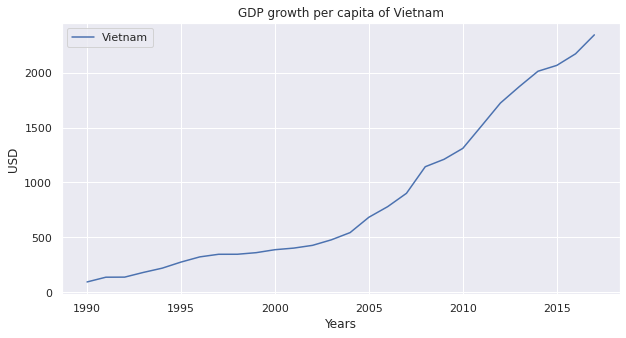

In [0]:
# Let's plot the GDP per capita of Vietnam from 1990 to 2017
# Your code here

In [0]:
sea_gdp_growth = [
    'Lao PDR', 
    'Thailand', 
    'Indonesia', 
    'Philippines', 
    'Vietnam'
]

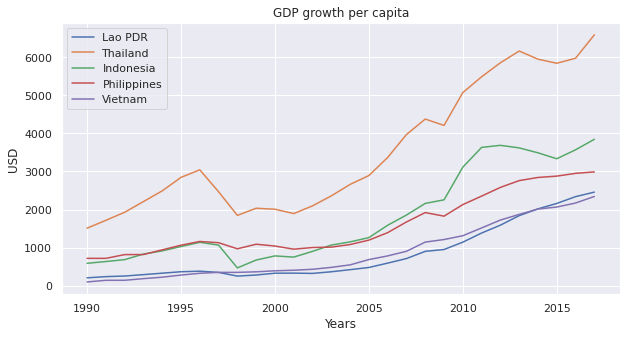

In [0]:
# Similar to previous step please plot all GDP growth per capita of the countries
# in sea_gdp_growth in one graph.
# Your code here

## Building Machine Learning Model for Population Growth Prediction

The main goal is to predict the population of Vietnam based on GDP and Life Expectancy in the future. However, neither GDP and Life Expectancy are available in the future. Therefore, the most obvious solution is to build models to predict GDP and Life Expectancy, then use these predicted values to predict the population.

As it is illustrated in the line charts of GDP, Life Expectancy, Population, we decided to utilize following models:

* Build Polynomial Regression for GDP
* Build Linear Regression for Life Expectancy
* Build Linear Regression for Population

**How to validate the models?**

The interesting idea to validate the models within this work is to train the models from 1960 to 2007 and use them to predict the population of 2016 and compare with true population provided from World Bank Group.

**Remember the missing values of GDP?**

Recall that form 1960 to 1984, Vietnamese GDP had not been available yet. Also, the Life Expectancy within this time period drops and raise significantly, which can make the model worse. A simple solution for this is to train the model with data only from 1985 to 2007.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#init 3 models
life_expectancy_model = LinearRegression()
gdp_model = LinearRegression()
population_model = LinearRegression()

poly_reg = PolynomialFeatures(degree = 10)

In [0]:
year_after_1985_before_2007 = (vietnam_data['year']<=2007) & (vietnam_data['year']>=1985)

In [0]:
training_data = vietnam_data[year_after_1985_before_2007]

### Linear Regression for lifeExpectancy

Coefficients: [0.25909684] Intercept: -445.07350592885314


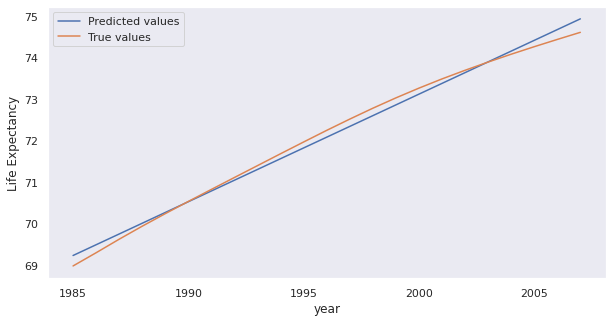

In [0]:
# Train the model using the years as the training feature
# and lifeExpectancy as the label
# Your code here 
X_train_life = ___
y_train_life = ___
life_expectancy_model.___

# The coefficients and intercept
print('Coefficients:', life_expectancy_model.coef_, 
      'Intercept:', life_expectancy_model.intercept_)

predicted_train_life = life_expectancy_model.predict(X_train_life)

plt.figure(figsize=(10, 5))
plt.plot(X_train_life, predicted_train_life)
plt.plot(X_train_life, y_train_life)
plt.legend(['Predicted values','True values'])
plt.xlabel('year')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()

### Polynomial for gdpPerCapita

Coefficients: [ 0.00000000e+00 -2.01078358e-24 -9.32336748e-31 -2.02216844e-43
 -1.59758728e-32 -2.65733545e-29 -3.81894599e-26 -4.44658406e-23
 -3.38115345e-20  2.46963804e-23 -4.34214957e-27] Intercept: 457947.38281922427


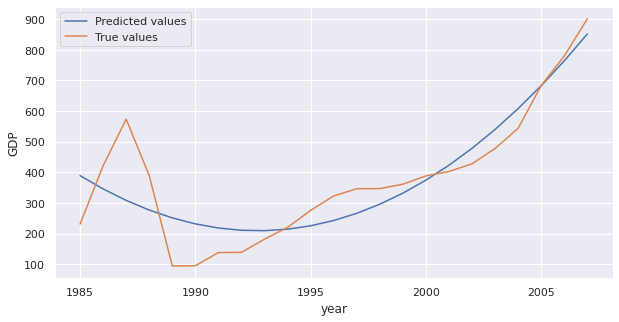

In [0]:
# Train the model using polynomial regression
X_train_gdp = training_data[['year']]
X_train_poly_gdp = poly_reg.fit_transform(X_train_gdp)
y_train_gdp = training_data['gdpPerCapita']
gdp_model.fit(X_train_poly_gdp, y_train_gdp)

# The coefficients and intercept
print('Coefficients:', gdp_model.coef_, 
      'Intercept:', gdp_model.intercept_)

predicted_train_gdp = gdp_model.predict (X_train_poly_gdp)

plt.figure(figsize=(10, 5))
plt.plot(X_train_gdp, predicted_train_gdp)
plt.plot(X_train_gdp, y_train_gdp)
plt.legend(['Predicted values','True values'])
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

> Another way to approach is training with the data after 1990.

### Linear Regression for Population

Coefficients: [-4.64011077e+05 -1.23068369e+02  6.18408495e+06] Intercept: 555517934.204718


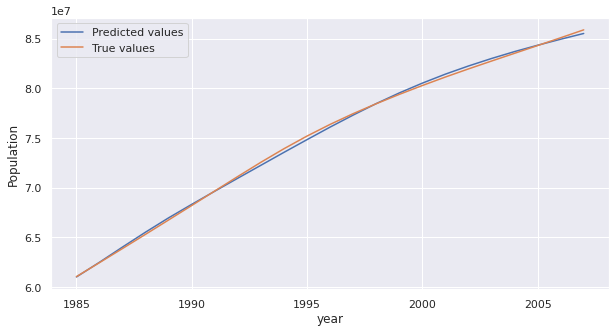

In [0]:
# Train the model using 'year','gdpPerCapita','lifeExpectancy'
# as the training features and 'population' as label
# Your code here 
X_train_population = ___
y_train_population = ___
population_model.___

# The coefficients and intercept
print('Coefficients:', population_model.coef_, 
      'Intercept:', population_model.intercept_)

predicted_train_population = population_model.predict(X_train_population)

plt.figure(figsize=(10, 5))
plt.plot(training_data['year'], predicted_train_population)
plt.plot(training_data['year'], y_train_population)
plt.legend(['Predicted values','True values'])
plt.xlabel('year')
plt.ylabel('Population')
plt.show()

### Making a prediction

At this point, the models are ready, now let’s try making a prediction of population and comparing with the true values.
Recall that the predicted value of GDP and Life Expectancy are used here as eventually these are neccessary if one wants to predict the future. The target year is 2017.

In [0]:
target_year = 2017

# need to transform to pass to polynomial regression
poly_target_year =  poly_reg.fit_transform([[target_year]]) 

# Predict the gdp an life expectancy in the target year
# Then use the results to predict the population
# Your code here
predicted_gdp = ___
predicted_life_expectancy = ___
predicted_population = ___

print ('Predicted GDP: ', predicted_gdp)
print ('Predicted Life Expectancy: ', predicted_life_expectancy)
print ('Predicted Population: ', predicted_population)

Predicted GDP:  [2098.9241014]
Predicted Life Expectancy:  [77.52481621]
Predicted Population:  [98769330.70662034]


**The true values:**

In [0]:
vietnam_data[vietnam_data['year'] == 2017]

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
14847,Vietnam,VNM,2017,NaN,48262356.0,47278444.0,2343.124575,95540800.0


**Congratulations! Great job!**